# Metrics of Institutions for Higher Education in the United States

### Authors: 

Jessiah Straw, Mukundh Nair

### Overview:

We are interested in getting a closer look at the profile data of institutions for higher education in the United States. We look at the top 50 most expensive institutions and make note of some interesting outliers, asses a matrix of density data to get a feel for the US market for higher education, and visualize cost and tuition values against undergraduate populations across the entire dataset.

Some high-level metrics that we take into consideration are:

* Overall admissions rate
* Average SAT scores of admitted students
* Total number of undergraduates
* Tuition for both in-state and out-of-state.


In [27]:

#Begin by importing all the required packages you need to work with the data
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
%matplotlib inline
import datetime as dt

#Download the data file from:
#https://ed-public-download.app.cloud.gov/downloads/Most-Recent-Cohorts-All-Data-Elements.csv
    
    #After downloading the data, assign the file path to load into pandas dataframe
url = "C:/Users/Jessiah/Desktop/DB_Data_Project/Colleges_All_Recent_Data.csv"

#import only the data needed to perform analysis
    #Data column headers pulled from data dictionary available at following url:
        #https://collegescorecard.ed.gov/assets/CollegeScorecardDataDictionary.xlsx
        
fields = ['CITY', 'INSTNM',
          'STABBR','TUITFTE','INEXPFTE','ADM_RATE',
          'SAT_AVG','UG','COSTT4_A','TUITIONFEE_OUT',
          'TUITIONFEE_IN','AVGFACSAL','PCTFLOAN',
          'FEMALE_DEBT_MDN','MALE_DEBT_MDN',
          'GRAD_DEBT_MDN']

#Create a dataframe using the read_csv function and reference the url
df = pd.read_csv(url,
                 usecols = fields,
                 index_col ='INSTNM')

#Rename all of the columns so that they are more readable and standardized
df = df.rename(columns={'CITY' : 'City', 
                        'STABBR' : 'State',
                        'ADM_RATE' : 'Admit Rate',
                        'SAT_AVG' : 'Avg. SAT',
                        'UG' : 'Undergrads', 
                        'COSTT4_A' : 'Avg. Cost',
                        'TUITIONFEE_IN' : 'IS Tuition',
                        'TUITIONFEE_OUT':'OOS Tuition',
                        'AVGFACSAL' : 'Avg. Faculty Salary',
                        'PCTFLOAN' : '% UG on Fed. Loans',
                        'FEMALE_DEBT_MDN': 'Median Female Debt',
                        'MALE_DEBT_MDN'  : 'Median Male Debt',
                        'GRAD_DEBT_MDN'  : 'Median Grad Debt'})

#Rename the index so that it makes sense
df.index.name = 'School'

#sort the table in descending order of average cost
df.sort_values(by=['Avg. Cost'], ascending = False )

#display the first 10 rows of data
df.head(50)
           

,City,State,Admit Rate,Avg. SAT,Undergrads,Avg. Cost,IS Tuition,OOS Tuition,TUITFTE,INEXPFTE,Avg. Faculty Salary,% UG on Fed. Loans,Median Grad Debt,Median Female Debt,Median Male Debt
School,,,,,,,,,,,,,,,
Alabama A & M University,Normal,AL,0.5256,827.0,4380.0,21475.0,9096.0,16596.0,9427.0,7437.0,6892.0,0.8284,33888,17500,14331
University of Alabama at Birmingham,Birmingham,AL,0.8569,1107.0,10331.0,20621.0,7510.0,17062.0,9899.0,17920.0,9957.0,0.5214,21941.5,14725,14000
Amridge University,Montgomery,AL,NaN,NaN,98.0,16370.0,6900.0,6900.0,12459.0,5532.0,3430.0,0.7795,23370,10875,8563
University of Alabama in Huntsville,Huntsville,AL,0.8203,1219.0,5220.0,21107.0,9158.0,21232.0,8956.0,10211.0,9302.0,0.4596,24097,16500,15245.5
Alabama State University,Montgomery,AL,0.5326,851.0,4348.0,18184.0,8720.0,15656.0,7733.0,7618.0,6609.0,0.7554,33118.5,15500,13738
The University of Alabama,Tuscaloosa,AL,0.5105,1185.0,15318.0,26400.0,9826.0,24950.0,12791.0,10239.0,9667.0,0.4010,23750,17750,16513.5
Central Alabama Community College,Alexander City,AL,NaN,NaN,1577.0,12054.0,3491.0,6576.0,2100.0,6847.0,5815.0,0.3977,16127,7381.5,5500
Athens State University,Athens,AL,NaN,NaN,2662.0,NaN,NaN,NaN,5476.0,6446.0,7711.0,0.6296,18595,12832,12666
Auburn University at Montgomery,Montgomery,AL,0.8017,1009.0,4098.0,17903.0,9080.0,19640.0,8071.0,6837.0,7255.0,0.5803,21335,10500,9500


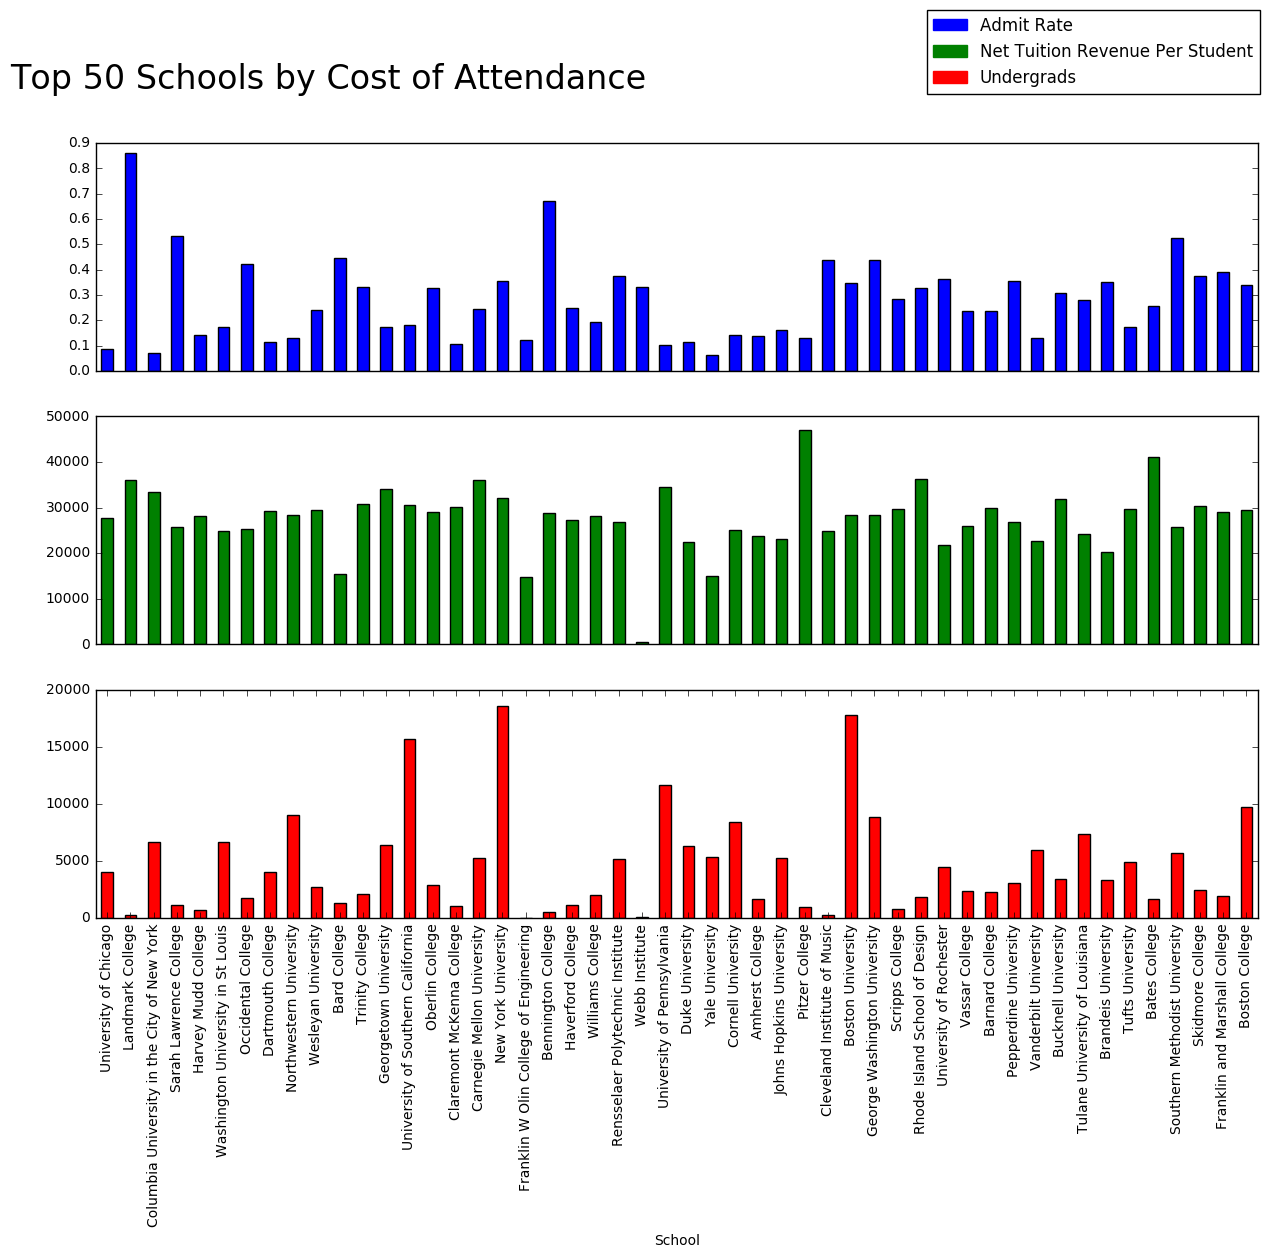

In [21]:

#Create a new dataframe that has sorted the table on Average Cost of attendance
df3=df.sort_values(['Avg. Cost'], ascending = False)

#Create figure that you will use to append subplots
fig=plt.figure(figsize =(15,10))

#You need multiple axes to represent multiple bar charts on the same figure.
#Create those axes here: 

#first subplot
ax1 = plt.subplot(311)

#second subplot
ax2 = plt.subplot(312)

#third subplot
ax3 = plt.subplot(313)

# Share the x axes so that all the data can be tied to the same school

ax1.get_shared_x_axes().join(ax1, ax2, ax3)

#create admit rate lines
l1 = df3['Admit Rate'].iloc[1:51].plot(ax=ax1, kind = 'bar', color = 'Blue', label = 'Admit Rate')

#create tuition cost lines
l2 = df3['TUITFTE'].iloc[1:51].plot(ax=ax2, kind = 'Bar', color = 'Green', label = 'TUITFTE')

#create Undergrads lines
l3 = df3['Undergrads'].iloc[1:51].plot(ax=ax3, kind = 'Bar', color = 'Red', label = 'Undergrads')

# hide the ticks on the x axes across admit rate and tuition cost plots
ax1.axes.get_xaxis().set_visible(False)
ax1.set_ylabel('')

ax2.axes.get_xaxis().set_visible(False)
ax2.set_ylabel('')

# show the ticks on the x axis for Undergrads plot
ax3.axes.get_xaxis().set_visible(True)
ax3.set_ylabel('')

# create a title above the group of subplots
fig.suptitle("Top 50 Schools by Cost of Attendance", x = 0.28, fontsize = 24)

#create 'proxy artists' to satisfy the legend for all subplots
red_patch =mpatches.Patch(color = 'Red', label = 'Undergrads')
blue_patch = mpatches.Patch(color = 'Blue', label = 'Admit Rate')
green_patch = mpatches.Patch(color = 'Green', label = 'Net Tuition Revenue Per Student')

#create consolidated legend for all subplots
plt.legend(handles=[blue_patch, green_patch, red_patch], bbox_to_anchor=(1.03, 3.8), loc=5, borderaxespad=2)

plt.show()

### An Overview of the Top 50 U.S. Institutions by Cost

At first glance, we see some of the usual suspects populating this output. The University of Chicago is holding the top position as the most expensive school. Several of the Ivy-League names show up as well, including Columbia University, Dartmouth University, the University of Pennsylvania, Yale, etc. Of course, New York University is also present, holding position number 18.

When reviewing this output, we are interested in counter-intuitive results. For example, it would make sense that an institution with a high admit rate would have a high undergraduate population and, potentially, a relatively low tuition cost. Elite schools tend to have a low admit rate, charge a lot for tuition, and maintain a moderate-to-large undergraduate population. Take the University of Pennsylvania, for example. The University of Pennsylvania has an undergraduate population between 10-15K, earns between $30-$40K in tuition per full time student, and admits only approximately 10% of applicants on average. This seems pretty straightforward. What about an institution that has the same revenue figures for tuition as the University of Pennsylvania, admits around 85% of applicants, and has an incredibly low population of undergraduates?  This would seem counter-intuitive, indeed. This is the case for Landmark College.

Landmark College is a small private college in Vermont. Landmark was the first higher level institution that focused on providing education for students with learning disabilities such as dyslexia, ADHD, or Autism Spectrum Disorder (ASD). As a result, Landmark has a high cost per student, given that each student needs more individual attention; the school has 80 academic staff for 500 students. 

Another little known, anomalous school is the Webb Institute, which ranks within the top 25 most expensive institutions in the data set. Webb is an institution specifically created to serve as a pipeline for naval engineering and has an undergraduate population of fewer than 100 students, with around 10 academic staff. Despite its minuscule size, Webb has an endowment of $40 million. Like Landmark College, Webb is a costly school that caters to a very specific group of undergraduate students. 

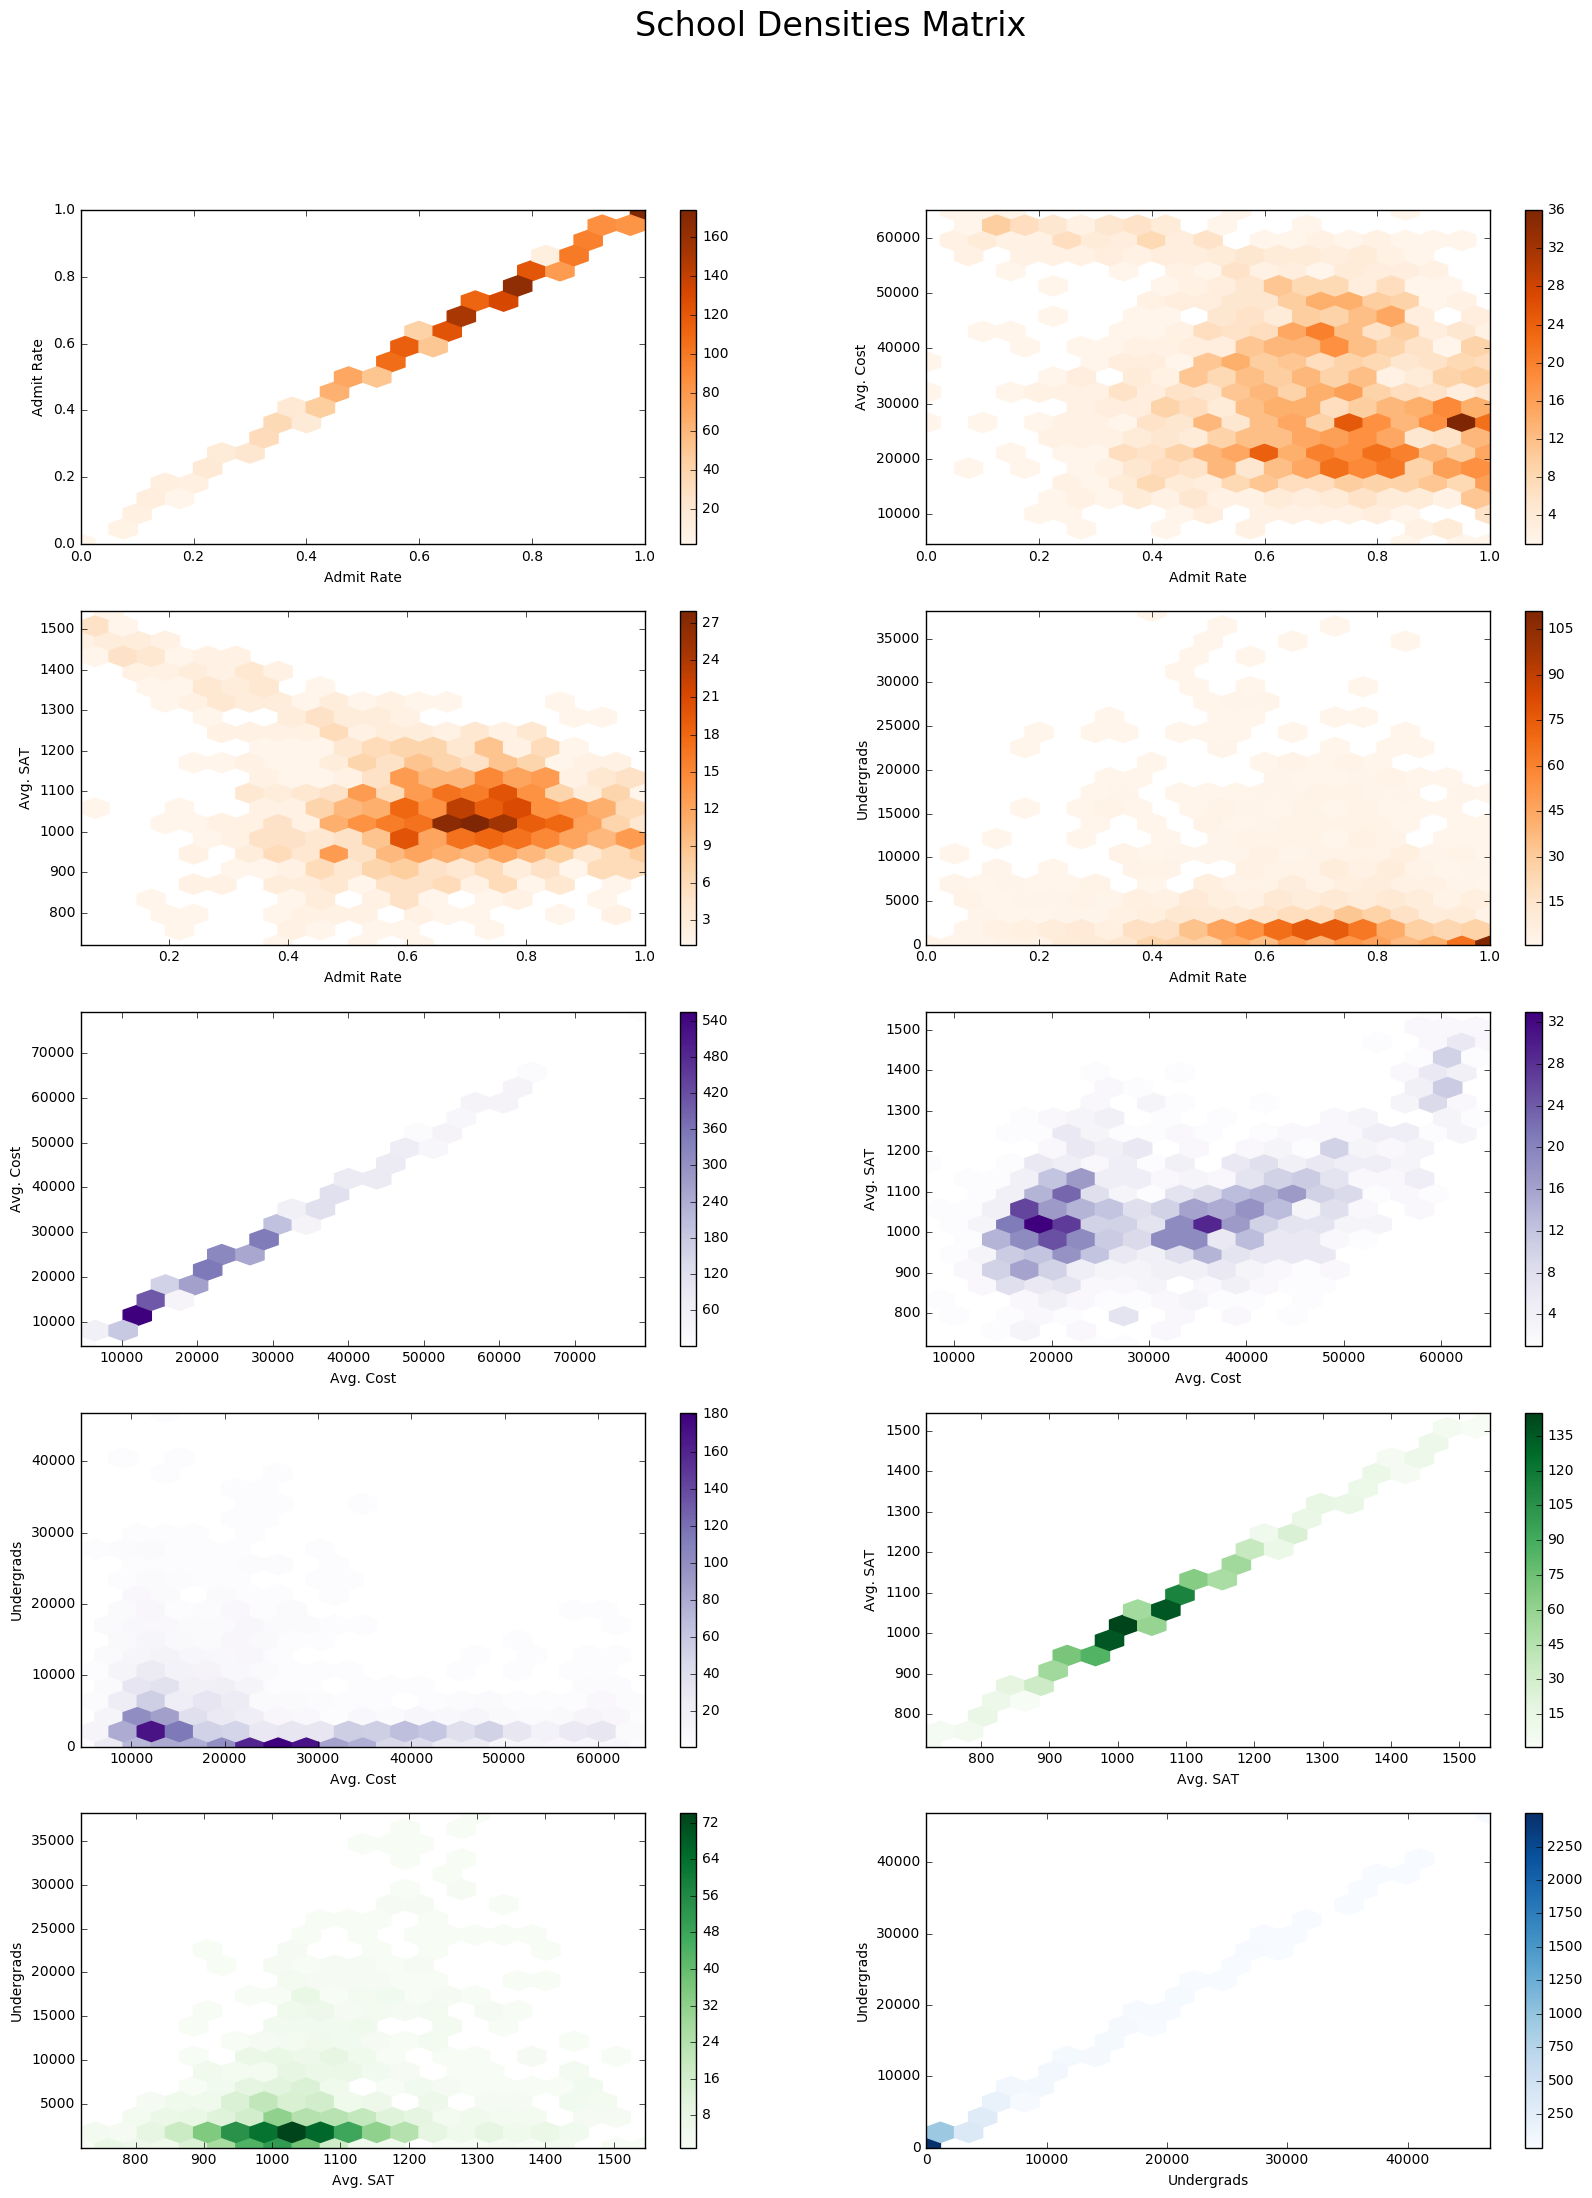

In [22]:

#Create a figure that you will use to append subplots
fig2= plt.figure(figsize =(20,25))


# The next four charts compare Admit Rate as a base line against the other variables
ax2_1 = plt.subplot2grid((5,2),(0,0))

df3.plot(ax=ax2_1, cmap = cm.Oranges, kind = 'hexbin', x='Admit Rate', y= 'Admit Rate', gridsize = 20, mincnt = 1)

ax2_2 = plt.subplot2grid((5,2),(0,1))

df3.plot(ax=ax2_2, cmap = cm.Oranges, kind = 'hexbin', x='Admit Rate', y= 'Avg. Cost', gridsize = 20, mincnt = 1)

ax2_3 = plt.subplot2grid((5,2),(1,0))

df3.plot(ax=ax2_3, cmap = cm.Oranges, kind = 'hexbin', x='Admit Rate', y= 'Avg. SAT', gridsize = 20, mincnt = 1)

ax2_4 = plt.subplot2grid((5,2),(1,1))

df3.plot(ax=ax2_4, cmap = cm.Oranges, kind = 'hexbin', x='Admit Rate', y= 'Undergrads', gridsize = 20, mincnt = 1)


#The next three charts compare Avg. Cost as a base line against the other variables
ax2_5 = plt.subplot2grid((5,2),(2,0))

df3.plot(ax=ax2_5, cmap = cm.Purples, kind = 'hexbin', x='Avg. Cost', y= 'Avg. Cost', gridsize = 20, mincnt = 1)

ax2_6 = plt.subplot2grid((5,2),(2,1))

df3.plot(ax=ax2_6, cmap = cm.Purples, kind = 'hexbin', x='Avg. Cost', y= 'Avg. SAT', gridsize = 20, mincnt = 1)

ax2_7 = plt.subplot2grid((5,2),(3,0))

df3.plot(ax=ax2_7, cmap = cm.Purples, kind = 'hexbin', x='Avg. Cost', y= 'Undergrads', gridsize = 20, mincnt = 1)


#The next two charts compare Avg. SAT as a base line against the other variables
ax2_8 = plt.subplot2grid((5,2),(3,1))

df3.plot(ax=ax2_8, cmap=cm.Greens, kind = 'hexbin', x='Avg. SAT', y= 'Avg. SAT', gridsize = 20, mincnt = 1)


ax2_9 = plt.subplot2grid((5,2),(4,0)) 

df3.plot(ax=ax2_9, cmap=cm.Greens, kind = 'hexbin', x='Avg. SAT', y= 'Undergrads', gridsize = 20, mincnt = 1)


##The next chart breaks out the avergae number of undergraduates in U.S schools
ax2_10 = plt.subplot2grid((5,2),(4,1))

df3.plot(ax=ax2_10, cmap=cm.Blues, kind = 'hexbin', x='Undergrads', y= 'Undergrads', gridsize = 20, mincnt = 1)


# create a title above the group of subplots
fig2.suptitle("School Densities Matrix", x = 0.5, fontsize = 24)

plt.show()


#### Based on the densities matrix above, the average institution in the United States has the following profile: 

**Admissions rate:** .60 - .80

**Undergraduate population:**  Primarily less than 5K, likely skewed by community colleges

**SAT scores:** 1,000 - 1,150

**Cost:** Two primary buckets of 10,000  - 15,000  and 20,000 - 30,000


### Admit rate X Avg. Cost 

- There appears to be three distinct, high-frequency results in this density plot, with the following characteristics: 

Admit Rate = .60 , Cost =  $ 22,000 

Admit Rate = .75 , Cost =  $ 27,000

Admit Rate = .95 , Cost =  $ 27,000 


While we can’t immediately point to an explanation, it is curious that institutions with a 95 percent admission rate would charge the same amount as those with a 20 percent lower admissions rate.


### Admit rate X Undergraduates

- The intersection with the greatest density on this plot is at approximately 100 percent admissions rate and fewer than 2,000 undergraduates. This makes sense, given that our dataset includes trade institutions (culinary, electrician training, etc.) and smaller community schools which are inclined to admit anyone who applies and pays to attend.


### Avg. Cost X Avg. SAT
- The data set shows that institutions begin to increase in price relatively steeply as it begins to admit students that score above 1200 on the SAT.


### Avg. Cost X Undergraduates
- The data shows that as the number of undergraduates enrolled in an institution decreases, the cost of attendance typically increases. This follows conventional wisdom for the most part, as smaller, more selective institutions typically cost more. 


### Avg. SAT X Undergraduates
- There is nothing surprising here. The density graph resembles a nearly perfect normal distribution that is in line with our average institution profile outlined above.


### Avg. SAT X Admit rate 
- This data visualization more or less follows conventional wisdom: as the SAT scores of admitted students rises, the admission rate of the institution decreases.

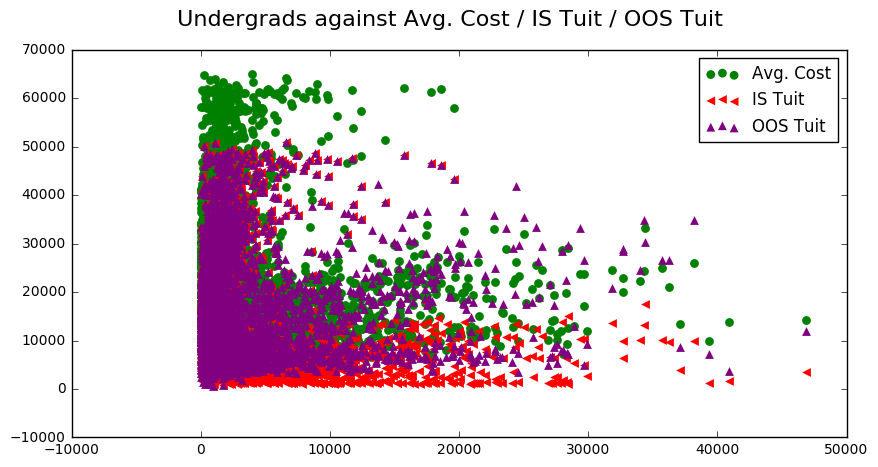

In [23]:

# Create a figure for the scatter plot
plt.figure(figsize=(10,5))

#assign a subplot to the figure
ax1 = plt.subplot2grid((1,1),(0,0),colspan=2)

#Create variables for the axis and data to be used in the scatter
x1 = df3['Undergrads']
y1 = df3['Avg. Cost']
y2 = df3['IS Tuition']
y3 = df3['OOS Tuition']

# Plot scattered data in the subplot
s1 = plt.scatter(x1, y1, s=40, lw=0, color='Green', marker='o', label=r'Avg. Cost')
s2 = plt.scatter(x1, y2, s=40, lw=0, color='Red', marker='<', label=r'IS Tuit')
s3 = plt.scatter(x1, y3, s=40, lw=0, color='Purple', marker='^', label=r'OOS Tuit')

# Create a legend depicting all scatter data
lgd = plt.legend((s1, s2, s3), (r'Avg. Cost', r'IS Tuit', r'OOS Tuit'), loc='upper right')

#Create a title above the plot
plt.gcf().suptitle(r' Undergrads against Avg. Cost / IS Tuit / OOS Tuit', size=16)

plt.show()


### How does cost and tuition change as the undergraduate population increases?

For institutions with undergraduate population that are fewer than 10,000 in-state and out-of-state tuition generally track one another, with out-of-state tuition being slightly higher. That said, it is interesting to note that as the undergraduate population increases, there is a noticable divergence between out-of-state tuition and in-state tuition, with out-of-state tuition dramatically increasing in relative price.

There are large public institutions that have huge undergraduate populations and which subsidize the cost for local students by charging higher prices for out-of-state students. This incentivizes local students to stay in-state, which would likely lead those students to find employment in and contribute to the tax revenue of that state.